# Creating Word Vectors with word2vec

In [1]:
import nltk
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure

In [2]:
# nltk.download('punkt')
# nltk.download('gutenberg')

In [3]:
from nltk.corpus import gutenberg

In [4]:
gberg_sents = gutenberg.sents()

In [5]:
gberg_sents[0:4]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.']]

In [6]:
gberg_sents[5]

['Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembrance',
 'of',
 'her',
 'caresses',
 ';',
 'and',
 'her',
 'place',
 'had',
 'been',
 'supplied',
 'by',
 'an',
 'excellent',
 'woman',
 'as',
 'governess',
 ',',
 'who',
 'had',
 'fallen',
 'little',
 'short',
 'of',
 'a',
 'mother',
 'in',
 'affection',
 '.']

In [7]:
len(gberg_sents)

98503

### Run word2vec

In [8]:
# model = Word2Vec(sentences=gberg_sents, vector_size=64, sg=0, window=8, min_count=5)
# model.save('model_cbow.model')

In [9]:
model = Word2Vec.load('model_cbow.model')

In [10]:
model.wv['new']

array([ 0.39181623,  0.09251352,  0.55974656,  0.0994511 , -0.05974155,
        0.8829982 ,  0.39564428, -0.20434609, -0.46523628,  1.4686358 ,
       -0.7805631 , -1.5690439 , -0.08233438,  0.27561983, -1.1671926 ,
       -0.18825056, -0.9111522 ,  0.28032267, -0.08688402, -0.02814485,
        0.68825203,  0.5821315 ,  0.33747748,  0.03053874,  0.74687713,
       -0.43245986, -1.0731958 ,  0.9633997 , -0.07701031,  1.5077193 ,
        0.45575088, -0.1011873 ,  0.1494914 , -0.50950736,  0.20502457,
        0.18983477,  1.0270417 , -1.0291802 , -0.1000203 ,  1.3006834 ,
        0.7259233 , -0.31517148, -0.56102484,  0.8137706 ,  0.48231527,
       -0.29704905, -1.4835398 , -1.1790408 , -1.3713039 , -0.20719649,
        0.7801152 ,  1.376983  , -0.7210553 , -1.111616  , -0.3591863 ,
        0.42531404,  1.0684541 , -0.03291001,  0.19571652,  0.24299453,
        0.98105645, -0.72114253,  0.3760867 ,  1.3298643 ], dtype=float32)

In [11]:
model.wv.most_similar('like')

[('white', 0.6460802555084229),
 ('black', 0.6084835529327393),
 ('big', 0.5887804627418518),
 ('tall', 0.5816473364830017),
 ('clean', 0.571915328502655),
 ('sycomore', 0.5704448819160461),
 ('serpent', 0.5527757406234741),
 ('cubit', 0.5526772141456604),
 ('red', 0.5513404607772827),
 ('sharp', 0.5484910607337952)]

#### Reduce word vector dimensionality with T-SNE

In [12]:
len(model.wv.key_to_index) # Words that met the criteria

17011

In [13]:
X = model.wv[model.wv.key_to_index]

In [14]:
tsne = TSNE()
X_2d = tsne.fit_transform(X)

In [15]:
X_2d[0:5]

array([[ 23.452389, -51.535736],
       [-10.329704, -67.489456],
       [ -8.232714, -70.09254 ],
       [ 23.072798, -51.66781 ],
       [ 14.023344, -47.93373 ]], dtype=float32)

In [16]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.key_to_index.keys()

In [17]:
coords_df.head()

,x,y,token
0,23.452389,-51.535736,","
1,-10.329704,-67.489456,the
2,-8.232714,-70.092537,and
3,23.072798,-51.667809,.
4,14.023344,-47.933731,of


In [18]:
coords_df.to_csv('cbow.csv', index=False)

#### Visulaize 2D representation of word vectors

In [19]:
coords_df = pd.read_csv('cbow.csv')

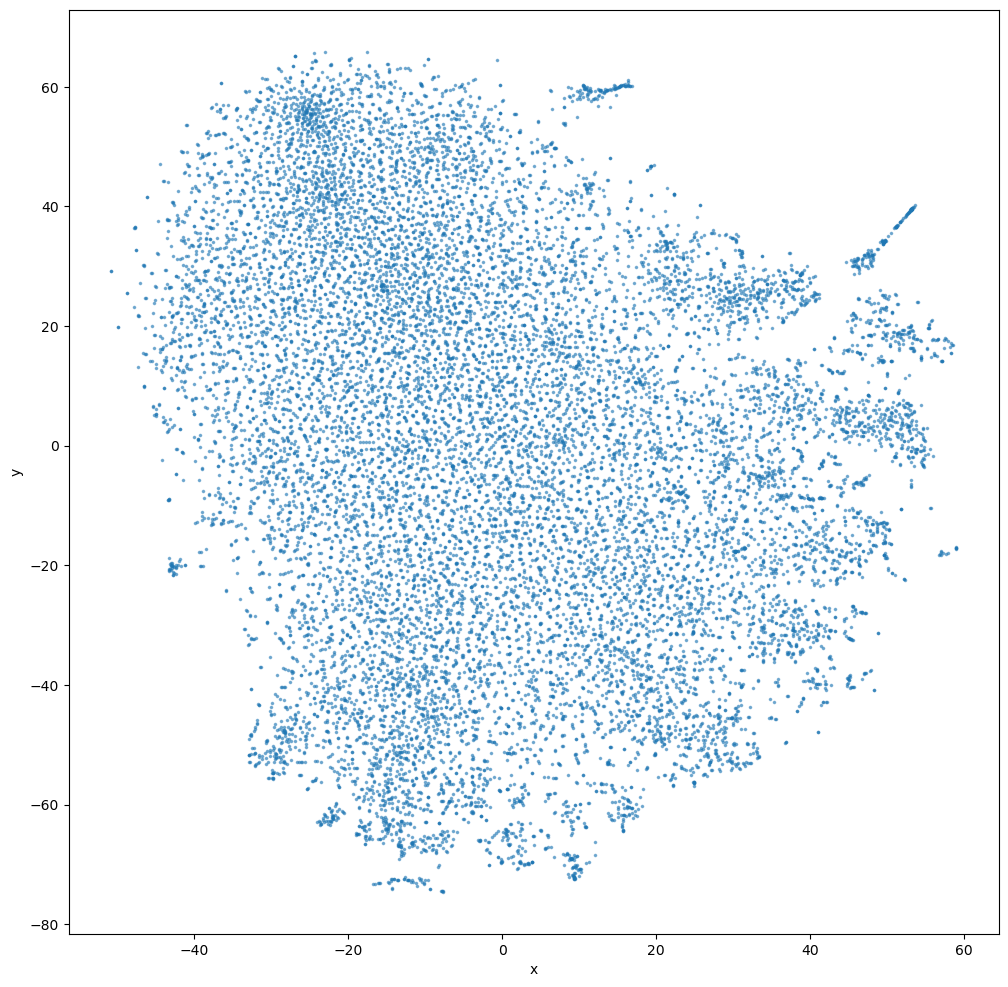

In [20]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12, 12), marker='.', s=10, alpha=0.5)

In [21]:
output_notebook()

Loading BokehJS ...

In [22]:
subset_df = coords_df.sample(n=2500)

In [23]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [25]:
show(p)